In [49]:
from datetime import datetime

author = "johan-yapo"
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Create the author and timestamp markdown content
markdown_content = f"""
# Author and Timestamp Information

- **Author**: {author}
- **Date**: {timestamp}
"""

# Display the markdown content
from IPython.display import display, Markdown
display(Markdown(markdown_content))


# Author and Timestamp Information

- **Author**: johan-yapo
- **Date**: 2025-03-28 21:17:16


# Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from CBFV import composition
from time import time
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GroupKFold
#formula group needs to be integers
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.patches import Patch
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import pickle

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [1]:
RNG_SEED = 8
np.random.seed(RNG_SEED)
curr_dir = os.getcwd()
DATA_PATH = os.path.join(os.path.dirname(curr_dir), 'data')
MODELS_PATH = os.path.join(os.path.dirname(curr_dir), 'models')
WEIGHTS_PATH = os.path.join(os.path.dirname(curr_dir), 'Weights')
ASSETS_PATH = os.path.join(os.path.dirname(curr_dir), 'Assets')
RESULTS_PATH = os.path.join(os.path.dirname(curr_dir), 'Results')
OUTPUT_PATH = os.path.join(os.path.dirname(curr_dir), 'output')

NameError: name 'np' is not defined

# Collection

In [28]:
df_train = pd.read_csv(DATA_PATH + "/intermetallics_train7.csv")
df_val = pd.read_csv(DATA_PATH + "/intermetallics_val7.csv")
df_test = pd.read_csv(DATA_PATH + "/intermetallics_test7.csv")
df_test_og = pd.read_csv(DATA_PATH + "/intermetallics_test7.csv")

# Preprocessing

In [2]:
df_train = df_train.drop_duplicates()
df_val = df_val.drop_duplicates()
df_test = df_test.drop_duplicates()
df_test_og = df_test_og.drop_duplicates()

NameError: name 'df_train' is not defined

In [ ]:
df_train.drop(columns=['composition', 'material_id',
              'structure'], axis=1, inplace=True)

df_val.drop(columns=['composition', 'material_id',
            'structure'], axis=1, inplace=True)

df_test.drop(columns=['composition', 'material_id',
             'structure'], axis=1, inplace=True)

df_train.drop(['total_magnetization',
              'total_magnetization_normalized_vol'], axis=1, inplace=True)
df_val.drop(['total_magnetization',
            'total_magnetization_normalized_vol'], axis=1, inplace=True)
df_test.drop(['total_magnetization',
             'total_magnetization_normalized_vol'], axis=1, inplace=True)

df_train.to_csv(os.path.join(
    DATA_PATH, 'trainSet_columnOrder.csv'), index=False)

print(f'df_train DataFrame shape: {df_train.shape}')
print(f'df_val DataFrame shape: {df_val.shape}')
print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (5197, 1594)
df_val DataFrame shape: (1504, 1594)
df_test DataFrame shape: (747, 1594)


In [ ]:
#Need to rename formula_pretty column to formula and total_magnetization_formula_units to target since CBFV needs that 
rename_dict = {'total_magnetization_normalized_formula_units': 'target'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

X_train_unscaled, y_train, formulae_train, skipped_train = composition.generate_features(df_train, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = composition.generate_features(df_val, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = composition.generate_features(df_test, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)

columns=X_train_unscaled.columns.values.tolist()

Processing Input Data: 100%|██████████| 5197/5197 [00:00<00:00, 10509.12it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 5197/5197 [00:00<00:00, 5976.21it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 1504/1504 [00:00<00:00, 16333.31it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1504/1504 [00:00<00:00, 10325.71it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 747/747 [00:00<00:00, 14682.37it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 747/747 [00:00<00:00, 9572.61it/s]


	Creating Pandas Objects...


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

X_train_new = np.concatenate((X_train, X_val), axis=0)
y_train_new = pd.concat((y_train, y_val), axis=0)

print(X_train_new.shape)

(6701, 1746)


In [ ]:
enc = OrdinalEncoder()

df_train_new = pd.concat((df_train, df_val), axis=0)
enc.fit(df_train_new[["formula", "number"]])
df_train_new[["formula", "number"]] = enc.transform(
    df_train_new[["formula", "number"]])

groups = df_train_new['formula']
gkf = GroupKFold(n_splits = 5)

# Data Visualizations

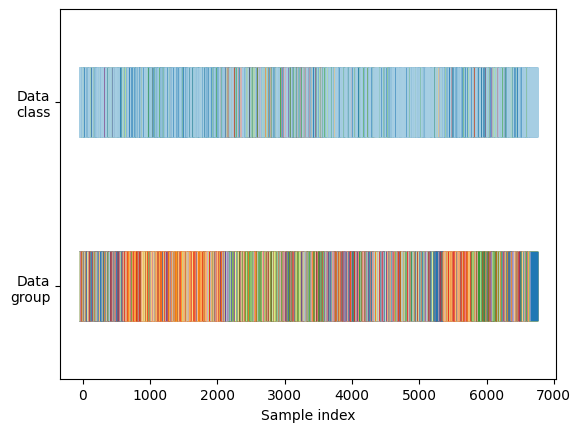

In [39]:
#Visualize data for CV
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


data_vis = visualize_groups(y_train_new, groups, "no groups")



In [40]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=5):
    """Create a sample plot for indices of a cross-validation object."""

    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

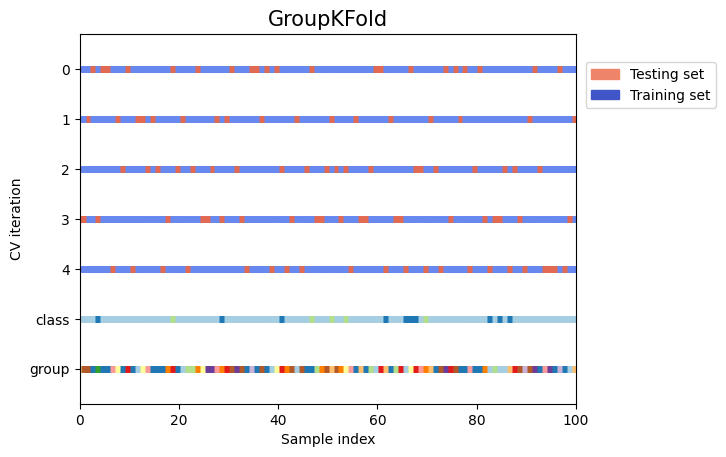

In [51]:
fig, ax = plt.subplots()
cv = GroupKFold(n_splits=5)
cv_plot = plot_cv_indices(gkf, df_train_new, y_train_new, groups, ax, 5)

ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
    ["Testing set", "Training set"],
    loc=(1.02, 0.8),
)

cv_plot.figure.savefig(os.path.join(OUTPUT_PATH, "etr_cv_plot2.png"), bbox_inches='tight', dpi=600, transparent = False)
##cv_plot.figure.savefig('C:/Users/joeya/Documents/Fokwa Group/ML_tutorial/intermetallics/plots/classic_models/jarvis/cv_plot2_{}_.png', 
    ##bbox_inches='tight', dpi=600)

# Training

In [52]:
etr_cv_model = ExtraTreesRegressor(n_estimators = 100, criterion = 'squared_error',
                                   max_features = 1.0, verbose=4)

In [53]:
scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error'}

ti = time()

scores = cross_validate(etr_cv_model, X_train_new, y_train_new, groups=groups, verbose=4,
                        scoring=scoring, cv = gkf, return_train_score=True)

etr_cv_model.fit(X_train_new, y_train_new)
dt = time() - ti

print(f'Finished fitting model, total time: {dt:0.2f} s')

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  2.1min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  8.1min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.2s


[CV] END  r2: (train=1.000, test=0.821) rmse: (train=-0.000, test=-3.828) total time= 8.3min
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  1.7min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  7.9min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.1s


[CV] END  r2: (train=1.000, test=0.879) rmse: (train=-0.000, test=-3.274) total time= 8.2min
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  2.2min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  8.4min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.2s


[CV] END  r2: (train=1.000, test=0.894) rmse: (train=-0.000, test=-3.189) total time= 8.7min
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  1.5min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  7.1min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.2s


[CV] END  r2: (train=1.000, test=0.872) rmse: (train=-0.000, test=-3.350) total time= 7.3min
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  2.2min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  8.1min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.3s


[CV] END  r2: (train=1.000, test=0.882) rmse: (train=-0.000, test=-3.228) total time= 8.4min
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  3.1min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed: 10.7min


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
Finished fitting model, total time: 3124.70 s


dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_rmse', 'train_rmse'])


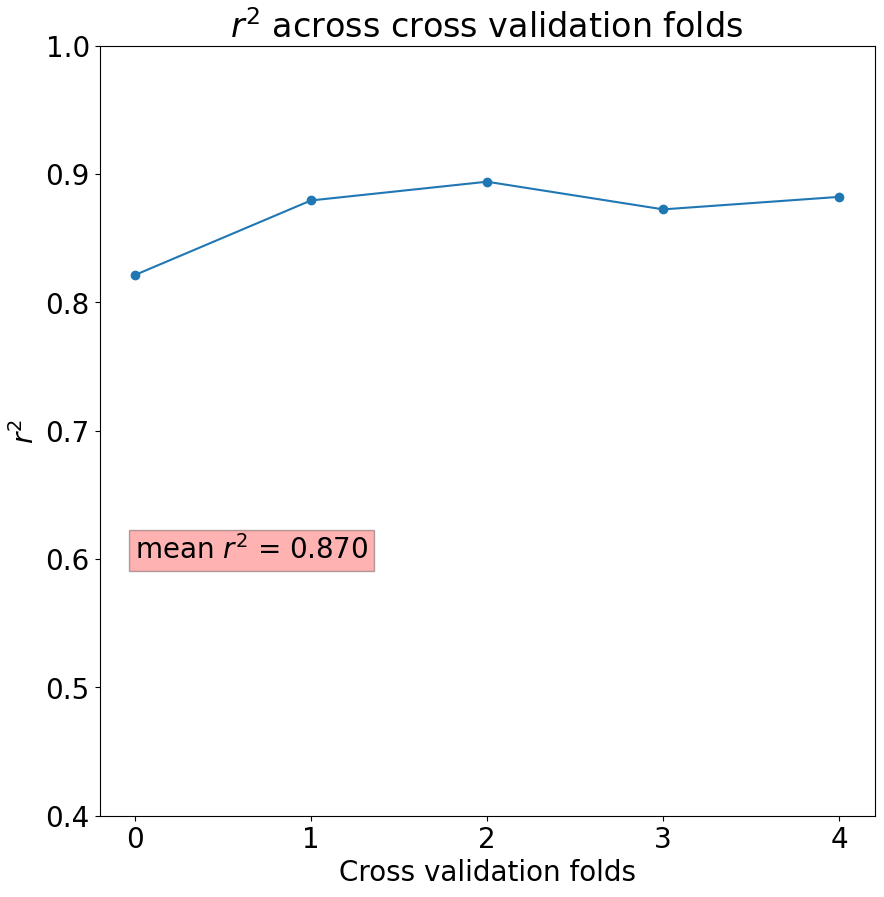

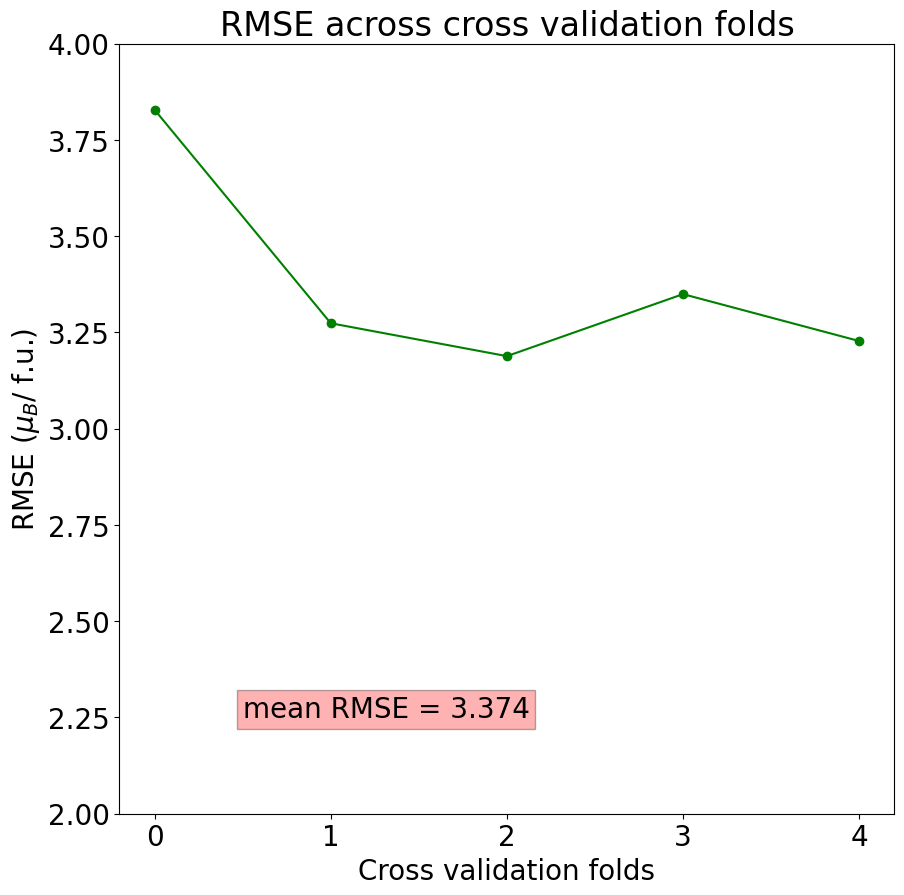

In [56]:
print(scores.keys())

scores_mean = {'r2': np.mean(scores['test_r2']),
                   'rmse' : np.mean(scores['test_rmse'])}

test_r2 = { '0':scores['test_r2'][0],'1':scores['test_r2'][1], '2':scores['test_r2'][2],
           '3':scores['test_r2'][3], '4': scores['test_r2'][4]}

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
plt.plot(range(len(test_r2.keys())),test_r2.values(), linestyle='-', marker = 'o')
plt.xticks(range(len(test_r2)), [str(key) for key in list(test_r2.keys())])
plt.ylim(0.4, 1)
plt.text(0,.6,'mean $r^2$ = {:0.3f}'.format(scores_mean['r2']), fontsize = 20, 
         bbox = dict(facecolor = 'red', alpha = 0.3))

plt.xlabel('Cross validation folds')
plt.ylabel('$r^2$')
plt.title('$r^2$ across cross validation folds')

r2_cv = plt.gcf()

r2_cv.savefig(os.path.join(OUTPUT_PATH, 'etr_r2_5-fold_cv.png'), 
    bbox_inches='tight', dpi=600, transparent = False)

test_rmse = { '0':np.negative(scores['test_rmse'][0]),'1':np.negative(scores['test_rmse'])[1],
            '2':np.negative(scores['test_rmse'][2]),'3':np.negative(scores['test_rmse'][3]), 
            '4': np.negative(scores['test_rmse'])[4]}

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
plt.plot(range(len(test_rmse.keys())),test_rmse.values(), 
         linestyle='-', marker = 'o', color='green')
plt.xticks(range(len(test_rmse)), [str(key) for key in list(test_rmse.keys())])
plt.ylim(2,4)
plt.text(0.5,2.25,'mean RMSE = {:0.3f}'.format(np.negative(scores_mean['rmse'])), fontsize = 20, 
         bbox = dict(facecolor = 'red', alpha = 0.3))

plt.xlabel('Cross validation folds')
plt.ylabel('RMSE ($\u03bc_B$/ f.u.)')
plt.title('RMSE across cross validation folds')

rmse_cv = plt.gcf()
rmse_cv.savefig(os.path.join(OUTPUT_PATH ,'etr_rmse_5-fold_cv.png'), 
    bbox_inches='tight', dpi=600, transparent = False)


## Learning curves

In [ ]:
train_sizes = [762, 1525, 2287, 3049, 3811, 4573, 5335, 6097, 6859, 7627]


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

ti = time()
train_sizes, train_scores, validation_scores = learning_curve(etr_cv_model, X_train_new, y_train_new, 
                                            groups=groups,scoring='r2',
                                            cv=gkf, 
                                            shuffle=True, random_state=RNG_SEED)
dt = time() - ti

#Plotting learning curve



train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)



val_scores_mean = validation_scores.mean(axis = 1)
val_scores_std = validation_scores.std(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(val_scores_mean, index = train_sizes))



plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, label = 'Training $r^2$')
plt.plot(train_sizes, val_scores_mean, label = 'Validation $r^2$')
plt.ylabel('r2 score', fontsize = 15)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,4)

#plt.text(5.5,5,'gap = {:0.3f}'.format(np.negative.difference(train(validation_scores_mean[4])),
#                                    train_scores_mean[4]), fontsize = 20, 
#         bbox = dict(facecolor = 'red', alpha = 0.3))

learn_curve = plt.gcf()
learn_curve.savefig('C:/Users/joeya/Documents/Fokwa Group/ML_tutorial/intermetallics/plots/classic_models/jarvis/learn_curve_{}_transparent.png', 
    bbox_inches='tight', dpi=600, transparent = True)

## Hyperparameter tuning and CV

In [ ]:
# Set up hyperparameter tuning grid to be implemented into CV
scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error'}

from sklearn.model_selection import GridSearchCV

params_etr = {'n_estimators':[50,1000], 'max_depth': [50, 100, 1000], 'min_samples_leaf':[100, 0.1]
               , 'min_samples_split': [100, 0.1], 'max_features':[1.0, 0.75] }


ti = time()
etr_model = ExtraTreesRegressor(criterion='squared_error')
gs_etr = GridSearchCV(estimator=etr_model, param_grid=params_etr,verbose=4,
                    scoring = 'neg_root_mean_squared_error', cv = gkf, return_train_score=True, refit=True)

dt = time() - ti
print(f'Finished grid search, total time: {dt:0.2f} s')


ti = time()
gs_etr.fit(X_train_new, y_train_new,groups=groups)
dt = time() - ti

print(f'Finished fitting grid search model, total time: {dt:0.2f} s')

In [ ]:
# Set up hyperparameter tuning grid to be implemented into CV
scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error'}

from sklearn.model_selection import GridSearchCV

#Try with n_estimators = 50 to reduce computational cost and the change it to 1000 in next gs step
params_etr = {'n_estimators':[50, 100, 250, 500, 1000], 'min_samples_leaf':[3,4,5,6,7,8,9,10,11,12,13]
               , 'min_samples_split': [5 ,10, 20, 30, 40], 'max_features':[1.0 ,0.8, 0.5,0.3]}


ti = time()
etr_model = ExtraTreesRegressor(criterion='squared_error', random_state=RNG_SEED)
gs_etr = GridSearchCV(estimator=etr_model, param_grid=params_etr,verbose=4,
                    scoring = 'neg_root_mean_squared_error', cv = gkf, return_train_score=True, refit=True)

dt = time() - ti
print(f'Finished grid search, total time: {dt:0.2f} s')


ti = time()
gs_etr.fit(X_train_new, y_train_new,groups=groups)
dt = time() - ti

print(f'Finished fitting grid search model, total time: {dt:0.2f} s')

In [ ]:
# Convert results into a DataFrame
gs_results = pd.DataFrame(gs_etr.cv_results_)[['params','mean_test_score','mean_train_score','rank_test_score','mean_train_score']]
#sort by test scores
gs_results10.sort_values('rank_test_score')

mean_rmse_score = np.negative(gs_etr.best_score_)

gs_results.to_csv(os.path.join(OUTPUT_PATH, 'etr_gs_results.csv'), index = False)

## Learning curves after hyperparameter tuning

In [ ]:
train_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

etr_model2=ExtraTreesRegressor(n_estimators = 1000, criterion = 'squared_error',min_samples_split=10
                               ,min_samples_leaf=5 ,max_features = 1.0, verbose=4)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

ti = time()
train_sizes, train_scores, validation_scores = learning_curve(etr_model2, X_train_new, y_train_new, 
                                            groups=groups,scoring='r2',
                                            cv=gkf, 
                                            shuffle=True, random_state=RNG_SEED)
dt = time() - ti

#Plotting learning curve

train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)

val_scores_mean = validation_scores.mean(axis = 1)
val_scores_std = validation_scores.std(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(val_scores_mean, index = train_sizes))



plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, val_scores_mean, label = 'Validation error')
plt.ylabel('r2 score', fontsize = 15)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,4)

#plt.text(5.5,5,'gap = {:0.3f}'.format(np.negative.difference(train(validation_scores_mean[4])),
#                                    train_scores_mean[4]), fontsize = 20, 
#         bbox = dict(facecolor = 'red', alpha = 0.3))

learn_curve = plt.gcf()

In [ ]:
#new model after hyperparameter tuning to make CV fold plots
from sklearn.model_selection import cross_validate
etr_cv_model = ExtraTreesRegressor(n_estimators = 1000, criterion = 'squared_error',min_samples_split=10
                               ,min_samples_leaf=5 ,max_features = 1.0, verbose=4)

scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error'}

ti = time()

scores = cross_validate(etr_cv_model, X_train_new, y_train_new, groups=groups, verbose=4,
                        scoring=scoring, cv = gkf, return_train_score=True)

etr_cv_model.fit(X_train_new, y_train_new)
dt = time() - ti

print(f'Finished fitting model, total time: {dt:0.2f} s')

print(scores.keys())

In [ ]:
print(scores['test_r2'])
UNTRIMMED_train_scores = pd.DataFrame()
UNTRIMMED_train_scores['test_r2']=scores['test_r2']
#UNTRIMMED_train_scores_r2.to_csv('C:/Users/joeya/Documents/Fokwa Group/ML_tutorial/Intermetallics/tables&lists/jarvis/UNTRIMMED_test_r2.csv', index=True)

scores_mean = {'r2': np.mean(scores['test_r2']),
                   'rmse' : np.mean(scores['test_rmse'])}

test_r2 = { '0':scores['test_r2'][0],'1':scores['test_r2'][1], '2':scores['test_r2'][2],
           '3':scores['test_r2'][3], '4': scores['test_r2'][4]}

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,10))
plt.plot(range(len(test_r2.keys())),test_r2.values(), linestyle='-', marker = 'o')
plt.xticks(range(len(test_r2)), [str(key) for key in list(test_r2.keys())])
plt.ylim(0.7, 1)
plt.text(0, 0.75,'mean $r^2$ = {:0.3f}'.format(scores_mean['r2']), fontsize = 25, 
         bbox = dict(facecolor = 'red', alpha = 0.3))

plt.xlabel('Cross validation folds')
plt.ylabel('$r^2$ (arb. units)' )
plt.title('$r^2$ across cross validation folds')

r2_cv = plt.gcf()

test_rmse = { '0':np.negative(scores['test_rmse'][0]),'1':np.negative(scores['test_rmse'])[1],
            '2':np.negative(scores['test_rmse'][2]),'3':np.negative(scores['test_rmse'][3]), 
            '4': np.negative(scores['test_rmse'])[4]}

UNTRIMMED_train_scores['test_rmse']=scores['test_rmse']

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,10))
plt.plot(range(len(test_rmse.keys())),test_rmse.values(), 
         linestyle='-', marker = 'o', color='green')
plt.xticks(range(len(test_rmse)), [str(key) for key in list(test_rmse.keys())])
plt.ylim(1, 5)
plt.text(0,2.0,'mean RMSE = {:0.3f}'.format(np.negative(scores_mean['rmse'])), fontsize = 25, 
         bbox = dict(facecolor = 'red', alpha = 0.3))

plt.xlabel('Cross validation folds')
plt.ylabel('RMSE ($\u03bc_B$/ f.u.)', fontsize=25)
plt.title('RMSE across cross validation folds')

rmse_cv = plt.gcf()

# Recursive Feature Elimination with Cross Validation

In [ ]:
#%% Use RFECV to determine the optimal number of features
from sklearn.feature_selection import RFECV
etr_estimator = ExtraTreesRegressor(n_estimators = 50, criterion = 'squared_error',
                 min_samples_split=10,min_samples_leaf=5 ,max_features = 1.0)

rfecv = RFECV(estimator = etr_estimator, step=0.01, cv =gkf, scoring = 'neg_mean_squared_error', 
              min_features_to_select = 80,verbose = 3)

fit = rfecv.fit(X_train_new, y_train_new, groups = groups)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

n_scores= len(rfecv.cv_results_['mean_test_score'])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel('Mean test neg MSE')
plt.errorbar(
    range(5, n_scores + 5),
    rfecv.cv_results_['mean_test_score'],
    yerr=rfecv.cv_results_['std_test_score']
    )
plt.title("Recursive Feature Elimination \nwith correlated features")

opt_nFeatures = rfecv.n_features_

rfecv_plot = plt.gcf()

In [ ]:
#Use recursive feature selection class in Sklearn to cut down the number of features.
from sklearn.feature_selection import RFE 

etr_estimator = ExtraTreesRegressor(n_estimators = 100, criterion = 'squared_error',
                 min_samples_split=10,min_samples_leaf=6 ,max_features = 1.0)

#define the method
rfe = RFE(estimator = etr_estimator, n_features_to_select = opt_nFeatures, step=0.01, verbose = 4)

#fit the model
rfe.fit(X_train_new, y_train_new)

In [ ]:
#%% Try cutting down to 11:1 observations:features ratio

# Make a new df with train and val and then featurize it.

df_train_trim= pd.concat([df_train, df_val], ignore_index = True)

#Get the bottom i features and remove them from the the train/val/test dataset
i = 1615
dropped_features = sorted_featureimportances_df['Feature'].tail(i).values.tolist()
#df_dropped_features = pd.DataFrame(dropped_features)
#df_dropped_features.to_csv('C:/Users/joeya/Documents/Fokwa Group/ML_tutorial/Intermetallics/tables&lists/jarvis/Set7/dropped_features.csv', index=False)

In [ ]:
X_train_trim_unscaled, y_train_trim, formulae_train_new, skipped_train_new = composition.generate_features(df_train_trim, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)

X_train_trim_unscaled = X_train_trim_unscaled.drop(axis=1, labels=dropped_features)
X_test_trim_unscaled = X_test_unscaled.drop(axis=1, labels=dropped_features)

X_test_unscaled, y_test, formulae_test, skipped_test = composition.generate_features(df_test, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True)

X_test = scaler.fit_transform(X_test_unscaled)
X_test = normalize(X_test)

columns_trim=X_train_trim_unscaled.columns.values.tolist()
df_kept_columns = pd.DataFrame(columns_trim)
df_kept_columns.to_csv(os.path.join(OUTPUT_PATH,'kept_features.csv'),  index = False)

# Final Model

In [ ]:
scaler = StandardScaler()

X_train_trim = scaler.fit_transform(X_train_trim_unscaled)

X_train_trim= normalize(X_train_trim)

X_test_trim = scaler.fit_transform(X_test_trim_unscaled)
X_test_trim = normalize(X_test_trim)

In [ ]:
# Set up hyperparameter tuning for final model
scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error'}

from sklearn.model_selection import GridSearchCV

#Try with n_estimators = 50 to reduce computational cost and the change it to 1000 in next gs step
params_etr = {'n_estimators':[50], 'min_samples_leaf':[5,6,7,8,9,10,11,12]
               , 'min_samples_split': [5, 10, 15, 20, 30, 40]  }


ti = time()
etr_model2_tune = ExtraTreesRegressor(criterion='squared_error', random_state=RNG_SEED)
gs_etr = GridSearchCV(estimator=etr_model2_tune, param_grid=params_etr,verbose=4,
                    scoring = 'neg_root_mean_squared_error', cv = gkf, return_train_score=True, refit=True)

dt = time() - ti
print(f'Finished grid search, total time: {dt:0.2f} s')


ti = time()
gs_etr.fit(X_train_trim, y_train_trim,groups=groups)
dt = time() - ti

print(f'Finished fitting grid search model, total time: {dt:0.2f} s')

#Convert results into a DataFrame
gs_final_results = pd.DataFrame(gs_etr.cv_results_)[['params','mean_test_score','mean_train_score','rank_test_score','mean_train_score']]
#sort by test scores
gs_final_results.sort_values('rank_test_score')

mean_rmse_score = np.negative(gs_etr.best_score_)

gs_final_results.to_csv(os.path.join(OUTPUT_PATH,'gs_final_results.csv'), index = False)

In [ ]:
etr_cv_model2 = ExtraTreesRegressor(n_estimators = 1000, criterion = 'squared_error',min_samples_split=10
                               ,min_samples_leaf=5 ,max_features = 1.0, verbose=4)

scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error'}

ti = time()

scores = cross_validate(etr_cv_model2, X_train_trim, y_train_trim, groups=groups, verbose=4,
                        scoring=scoring, cv = gkf, return_train_score=True)

etr_cv_model2.fit(X_train_trim, y_train_trim)
dt = time() - ti

print(f'Finished fitting model, total time: {dt:0.2f} s')

import pickle

filename = os.path.join(MODELS_PATH , 'etr7_trimmed_hyperparameters_tuned.pickle')
pickle.dump(etr_cv_model2, open(filename, 'wb'))

In [ ]:
#Results for final model
print(scores.keys())
TRIMMED_train_scores = pd.DataFrame()
TRIMMED_train_scores['test_r2']=scores['test_r2']
TRIMMED_train_scores['test_rmse']=scores['test_rmse']
UNTRIMMED_train_scores.to_csv(os.path.join(OUTPUT_PATH ,'etr_TRIMMED_test_rawData.csv', index=False)

scores_mean = {'r2': np.mean(scores['test_r2']),
                   'rmse' : np.mean(scores['test_rmse'])}

test_r2 = { '0':scores['test_r2'][0],'1':scores['test_r2'][1], '2':scores['test_r2'][2],
           '3':scores['test_r2'][3], '4': scores['test_r2'][4]}

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,10))
plt.plot(range(len(test_r2.keys())),test_r2.values(), linestyle='-', marker = 'o')
plt.xticks(range(len(test_r2)), [str(key) for key in list(test_r2.keys())])
plt.ylim(0.7, 1)
plt.text(0,.75,'mean $r^2$ = {:0.3f}'.format(scores_mean['r2']), fontsize = 25, 
         bbox = dict(facecolor = 'red', alpha = 0.3))

plt.xlabel('Cross validation folds')
plt.ylabel('$r^2$')
plt.title('$r^2$ across cross validation folds')

r2_cv = plt.gcf()

test_rmse = { '0':np.negative(scores['test_rmse'][0]),'1':np.negative(scores['test_rmse'])[1],
            '2':np.negative(scores['test_rmse'][2]),'3':np.negative(scores['test_rmse'][3]), 
            '4': np.negative(scores['test_rmse'])[4]}

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,10))
plt.plot(range(len(test_rmse.keys())),test_rmse.values(), 
         linestyle='-', marker = 'o', color='green')
plt.xticks(range(len(test_rmse)), [str(key) for key in list(test_rmse.keys())])
plt.ylim(1, 5)
plt.text(0.2,2,'mean RMSE = {:0.3f}'.format(np.negative(scores_mean['rmse'])), fontsize = 25, 
         bbox = dict(facecolor = 'red', alpha = 0.3))

plt.xlabel('Cross validation folds')
plt.ylabel('RMSE ($\u03bc_B$/ f.u.)')
plt.title('RMSE across cross validation folds')

rmse_cv = plt.gcf()

## learning curve for final model

In [ ]:
train_sizes = np.linspace(0.1,1.0,10)

etr_model2=ExtraTreesRegressor(n_estimators = 1000, criterion = 'squared_error',min_samples_split=10
                               ,min_samples_leaf=5 ,max_features = 1.0, verbose=4)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

ti = time()
train_sizes, train_scores, validation_scores = learning_curve(etr_model2, X_train_trim, y_train_trim, 
                                            groups=groups,scoring='r2',
                                            cv=gkf, 
                                            shuffle=True, random_state=RNG_SEED)
dt = time() - ti

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)


val_scores_mean = validation_scores.mean(axis = 1)
val_scores_std = validation_scores.std(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(val_scores_mean, index = train_sizes))

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, label = 'Training $r^2$')
plt.plot(train_sizes, val_scores_mean, label = 'Validation $r^2$')
plt.ylabel('r2 score', fontsize = 25)
plt.xlabel('Training set size', fontsize = 25)
plt.title('Learning curves for a linear regression model', fontsize = 25, y = 1.03)
plt.legend()
#plt.ylim(0,4)

#plt.text(5.5,5,'gap = {:0.3f}'.format(np.negative.difference(train(validation_scores_mean[4])),
#                                    train_scores_mean[4]), fontsize = 20, 
#         bbox = dict(facecolor = 'red', alpha = 0.3))

learn_curve = plt.gcf()


## Model visualizations

In [ ]:
#Getting most important features

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'


importances_list = etr_cv_model2.feature_importances_.tolist()
features_list = X_train_trim_unscaled.columns.values.tolist()
featureimportances_dict = dict(zip(features_list, importances_list))
sorted_featureimportances_tuple = sorted(featureimportances_dict.items(), key=lambda x:x[1], reverse=True)
sorted_featureimportances_dict = {key: value for key, value in sorted_featureimportances_tuple}
sorted_featureimportances_df = pd.DataFrame.from_dict([sorted_featureimportances_dict]).T
sorted_featureimportances_df['Feature'] = sorted_featureimportances_df.index
sorted_featureimportances_df.columns = ['Importance', 'Feature']

sorted_featureimportances_df.to_csv(os.path.join(OUTPUT_PATH,'etr_feature_importance_table.csv'), index=True)

In [ ]:
#Plotting the most important x features
importances = etr_cv_model2.feature_importances_
included = X_train_trim_unscaled.columns.values
indices = np.argsort(importances)[::-1]

fig_bar1  = px.bar(
    x = included[indices][0:20],
    y = importances[indices][0:20],
    title = "Feature importances of model",
    labels = {"x": "Feature", "y": "Importance"}
    )
#fig_bar.show()
plotly.offline.plot(fig_bar1, filename=os.path.join(OUTPUT_PATH,'etr_final_top_features.html'))

#plotting the least important features

fig_bar2 = px.bar(
    x = included[indices][-20:],
    y = importances[indices][-20:],
    title = "Least important features of model",
    labels = {"x": "Feature", "y": "Importance"}
    )
plotly.offline.plot(fig_bar2, filename=os.path.join(OUTPUT_PATH, 'etr_final_bottom_features.html'))

# Testing

In [ ]:
#Define plotting function
from sklearn.metrics import r2_score

def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, $r^2: {r2_score(act, pred):0.4f}$')
    plt.legend(loc='upper left')
    
    return plot

#helper function(s)

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

In [ ]:
filename = os.path.join(MODELS_PATH , 'etr7_trimmed_hyperparameters_tuned.pickle')
loaded_model =pickle.load(open(filename, 'rb'))

y_pred_test = loaded_model.predict(X_test_trim)

r2, mae, rmse = evaluate_model(loaded_model, X_test_trim, y_test)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')

plot = plot_pred_act(y_test, y_pred_test, loaded_model, reg_line=True, label='Magnetization ($\u03bc_B$/ f.u.)')

## Residuals

In [ ]:
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals ($\u03bc_B$/f.u.)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

plt.savefig(os.path.join(OUTPUT_PATH, 'histogram_of_residuals_TRIMMED_dataset.png'), 
            bbox_inches='tight', dpi=600, transparent = False)

plt.figure(figsize=(10, 5))
plt.plot(residuals, marker='o', linestyle='', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals over Index Order')
plt.xlabel('Index')
plt.ylabel('Residuals ($\u03bc_B$/f.u.)')
plt.legend()

plt.savefig(os.path.join(OUTPUT_PATH, 'residuals_test_dataset.png'), 
            bbox_inches='tight', dpi=600, transparent = False)